# **Delta Learning**
## **Jay Bhanushali (60009200047)**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
c = 1
n_epochs = 250

### X = input, Y = output

In [3]:
X = [0.5, 2.5]
Y = [0.2, 0.9]

### **Activation Function**

In [4]:
def activation(x,w,b):
    y_in = np.dot(w,x) + b
    # print(y_in)
    y_hat = 1/(1+ np.exp(-(y_in)))
    return y_hat

### **Weight and bias updation functions (for Gradient Descent)**

In [5]:
def delta_w(x, y, y_hat):
    dw = c * (y-y_hat) * (y_hat*(1-y_hat)) * x
    return dw

In [6]:
def delta_b(y, y_hat):
    db = c * (y-y_hat) * (y_hat*(1-y_hat))
    return db

### **SGD**
**Stochastic Gradient Descent**

In [7]:
def stochastic_gradient_descent(x, y):
    w = -2
    b = -2

    data = {}
    data['X'] = x
    data['Y'] = y
    data['Old Weights'] = w
    data['Old Bias'] = b

    cost=[]
    ws = []
    acc = []
    for epoch in range(n_epochs):    
        y_hat = activation(x,[w],b)
        if y_hat != y:
            a = y_hat/y
            acc.append(a)
            cost.append(y - y_hat)
            ws.append(w)
            dw = delta_w(x, y, y_hat)
            w += round(dw[0], 5)
            db = delta_b(y, y_hat)
            b += round(db[0], 5)

    data['New Weight'] = round(w,5)
    data['New Bias'] = round(b,5)
    data = pd.DataFrame([data], index=[0])
    print(data)
    print('\n')

    figure, axis = plt.subplots(1, 3, figsize=(18,5))
    # For Cost Function vs #Epochs
    axis[0].plot(range(n_epochs), cost)
    axis[0].set_xlabel('#Epochs')
    axis[0].set_ylabel('Cost')
    axis[0].set_title("#Epochs VS Cost")
    
    # For Cost Function vs Weights
    axis[1].scatter(ws, cost)
    axis[1].set_xlabel('Weights')
    axis[1].set_ylabel('Cost')
    axis[1].set_title("Weights VS Cost")
    
    acc = [j for i in acc for j in i]
    # For Cost Function vs Weights
    axis[2].scatter(range(n_epochs), acc)
    axis[2].set_xlabel('#Epochs')
    axis[2].set_ylabel('Accuracy')
    axis[2].set_title("#Epochs VS Accuracy")
    plt.show()
    
    print('\n')

Stochastic Gradient Descent:

     X    Y  Old Weights  Old Bias  New Weight  New Bias
0  0.5  0.2           -2        -2    -1.35789  -0.71571




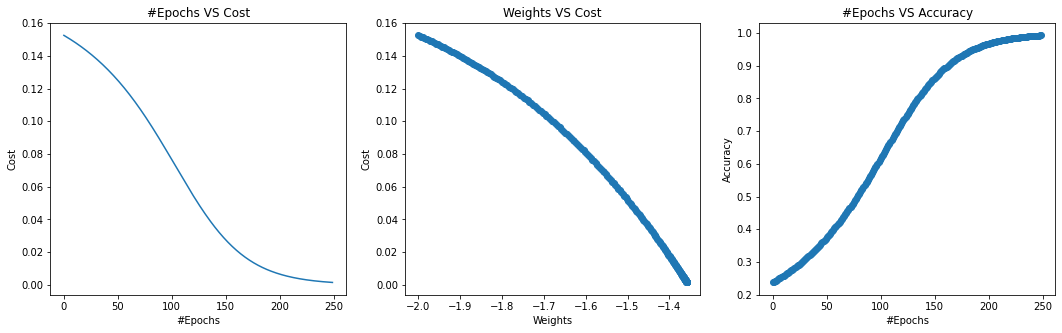



     X    Y  Old Weights  Old Bias  New Weight  New Bias
0  2.5  0.9           -2        -2     1.16985  -0.73202




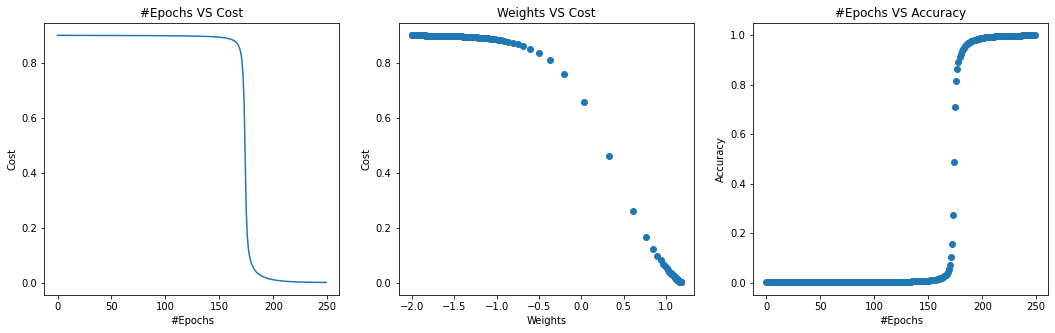

In [8]:
print('Stochastic Gradient Descent:\n')
for x,y in zip(X,Y):
    stochastic_gradient_descent(x,y)

### **Batch Gradient Descent**

In [9]:
def batch_gradient_descent(x, y):
    w = -2
    b = -2
    data = {}
    data['X'] = x
    data['Y'] = y
    data['Old Weights'] = w
    data['Old Bias'] = b

    iters = list(range(n_epochs*2))
    cost=[]
    ws = []
    acc = []

    for epoch in range(n_epochs):    
        for i in range(len(x)):
            y_hat = activation(x[i],[w],b)
            if y_hat != y[i]:
                acc.append(y_hat/y[i])
                cost.append(y[i]-y_hat)
                dw = delta_w(x[i], y[i], y_hat)
                # print(epoch, dw)
                w += round(dw[0], 5)
                ws.append(w)
                db = delta_b(y[i], y_hat)
                b += round(db[0], 5)

    data['New Weight'] = round(w,5)
    data['New Bias'] = round(b,5)

    data = pd.DataFrame([data], index=[0])
    print(data)
    print('\n')

    figure, axis = plt.subplots(1, 3, figsize=(18,5))
    # For Cost Function vs #Epochs
    axis[0].scatter(iters, cost)
    axis[0].set_xlabel('#Epochs')
    axis[0].set_ylabel('Cost')
    axis[0].set_title("#Epochs VS Cost")
    
    # For Cost Function vs Weights
    axis[1].scatter(ws, cost)
    axis[1].set_xlabel('Weights')
    axis[1].set_ylabel('Cost')
    axis[1].set_title("Weights VS Cost")
    
    # For Cost Function vs Weights
    axis[2].scatter(iters, acc)
    axis[2].set_xlabel('#Epochs')
    axis[2].set_ylabel('Accuracy')
    axis[2].set_title("#Epochs VS Accuracy")
    plt.show()
    
    print('\n')

Batch Gradient Descent:

            X           Y  Old Weights  Old Bias  New Weight  New Bias
0  [0.5, 2.5]  [0.2, 0.9]           -2        -2     1.69657  -2.14191




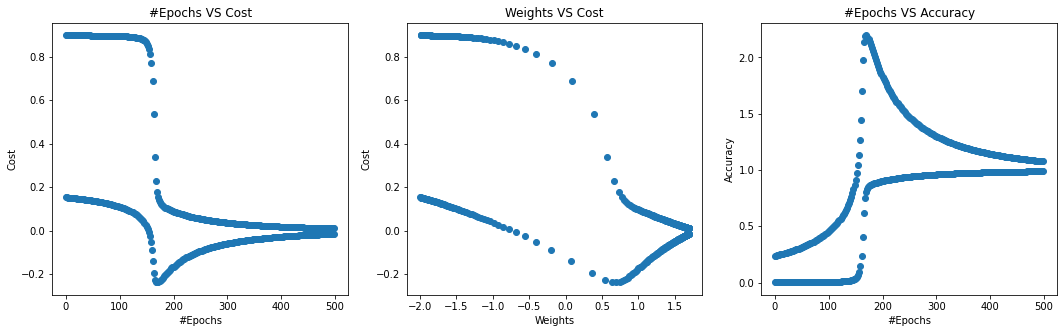

In [10]:
print('Batch Gradient Descent:\n')
batch_gradient_descent(X,Y)